# Primary Task: Predicting Flue Gas Emissions 

In [21]:
# Importing some basic python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [91]:
#list of files
files = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']
# read each data frame and store them in a list of dataframe
dfs = [pd.read_csv(file) for file in files]

df_combined = pd.concat(dfs, ignore_index= True)

#### Exploratory Data Analysis and some visulaization

In [23]:
df_combined

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  
0       0.32663   81.952  
1       0.44784   82.377  
2       0.45144   83.776  
3       0.23107   82.505  
4       0.26747   82.028  
...         ...      ...  
36728  10.99300   89.172  
36729  11.14400   88.849  
36730  11.41400   96.147  
36731   3.31340   64.738  
36732  11.98100  109.240  

[36733 rows x 11 columns]

In [24]:
df_combined.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

In [25]:
df_combined.isnull().sum() # For checking missing value

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [26]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB
None


* Scatter plot for CO and NOX for visualising any pattern

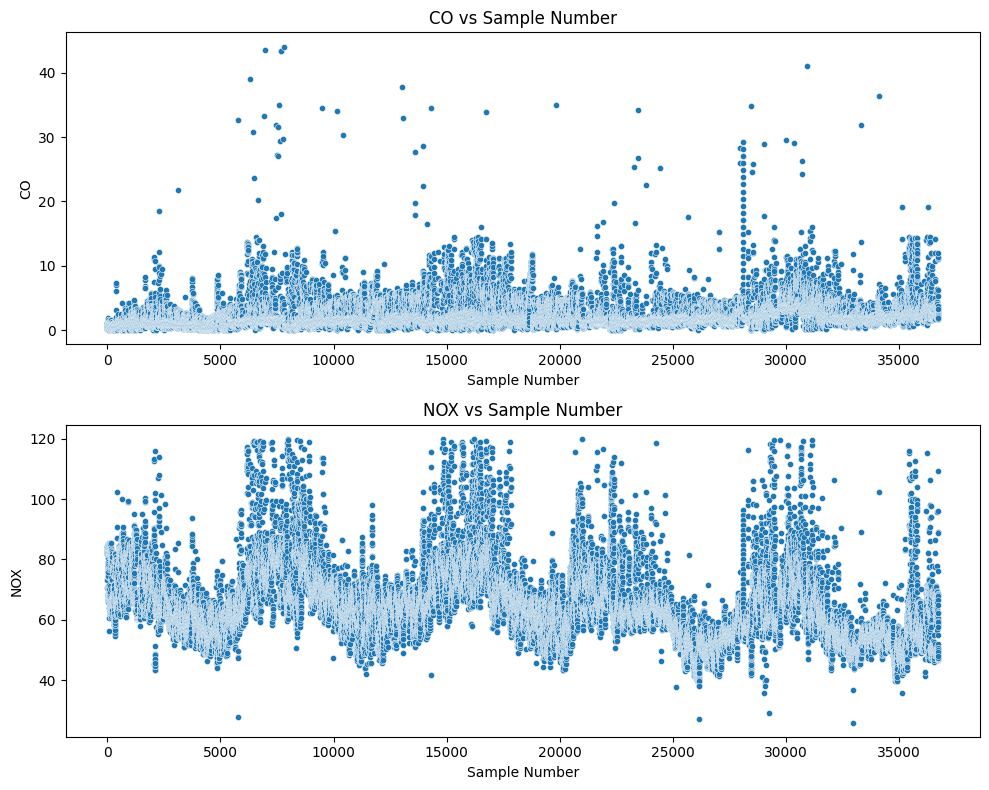

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # Create 2 subplots (rows=2, cols=1)

# Plot for target CO
sns.scatterplot(x=df_combined.index, y=df_combined['CO'], ax=axes[0], s=20)
axes[0].set_title('CO vs Sample Number')
axes[0].set_xlabel('Sample Number')
axes[0].set_ylabel('CO')

# Plot for target NOX
sns.scatterplot(x=df_combined.index, y=df_combined['NOX'], ax=axes[1], s=20)
axes[1].set_title('NOX vs Sample Number')
axes[1].set_xlabel('Sample Number')
axes[1].set_ylabel('NOX')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 2 rows for CO and NOX
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    subplot_titles=("CO vs Sample Number", "NOX vs Sample Number"))

# Add scatter plot for CO
fig.add_trace(
    go.Scatter(
        x=df_combined.index,
        y=df_combined['CO'],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.7),
        name='CO'
    ),
    row=1, col=1
)

# Add scatter plot for NOX
fig.add_trace(
    go.Scatter(
        x=df_combined.index,
        y=df_combined['NOX'],
        mode='markers',
        marker=dict(size=6, color='green', opacity=0.7),
        name='NOX'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    height=800, width=900,
    title_text="Emissions vs Sample Number",
    showlegend=True
)

# Update axes labels
fig.update_xaxes(title_text="Sample Number", row=2, col=1)
fig.update_yaxes(title_text="CO", row=1, col=1)
fig.update_yaxes(title_text="NOX", row=2, col=1)

# Show the plot
fig.show()


* Pairplot between variables

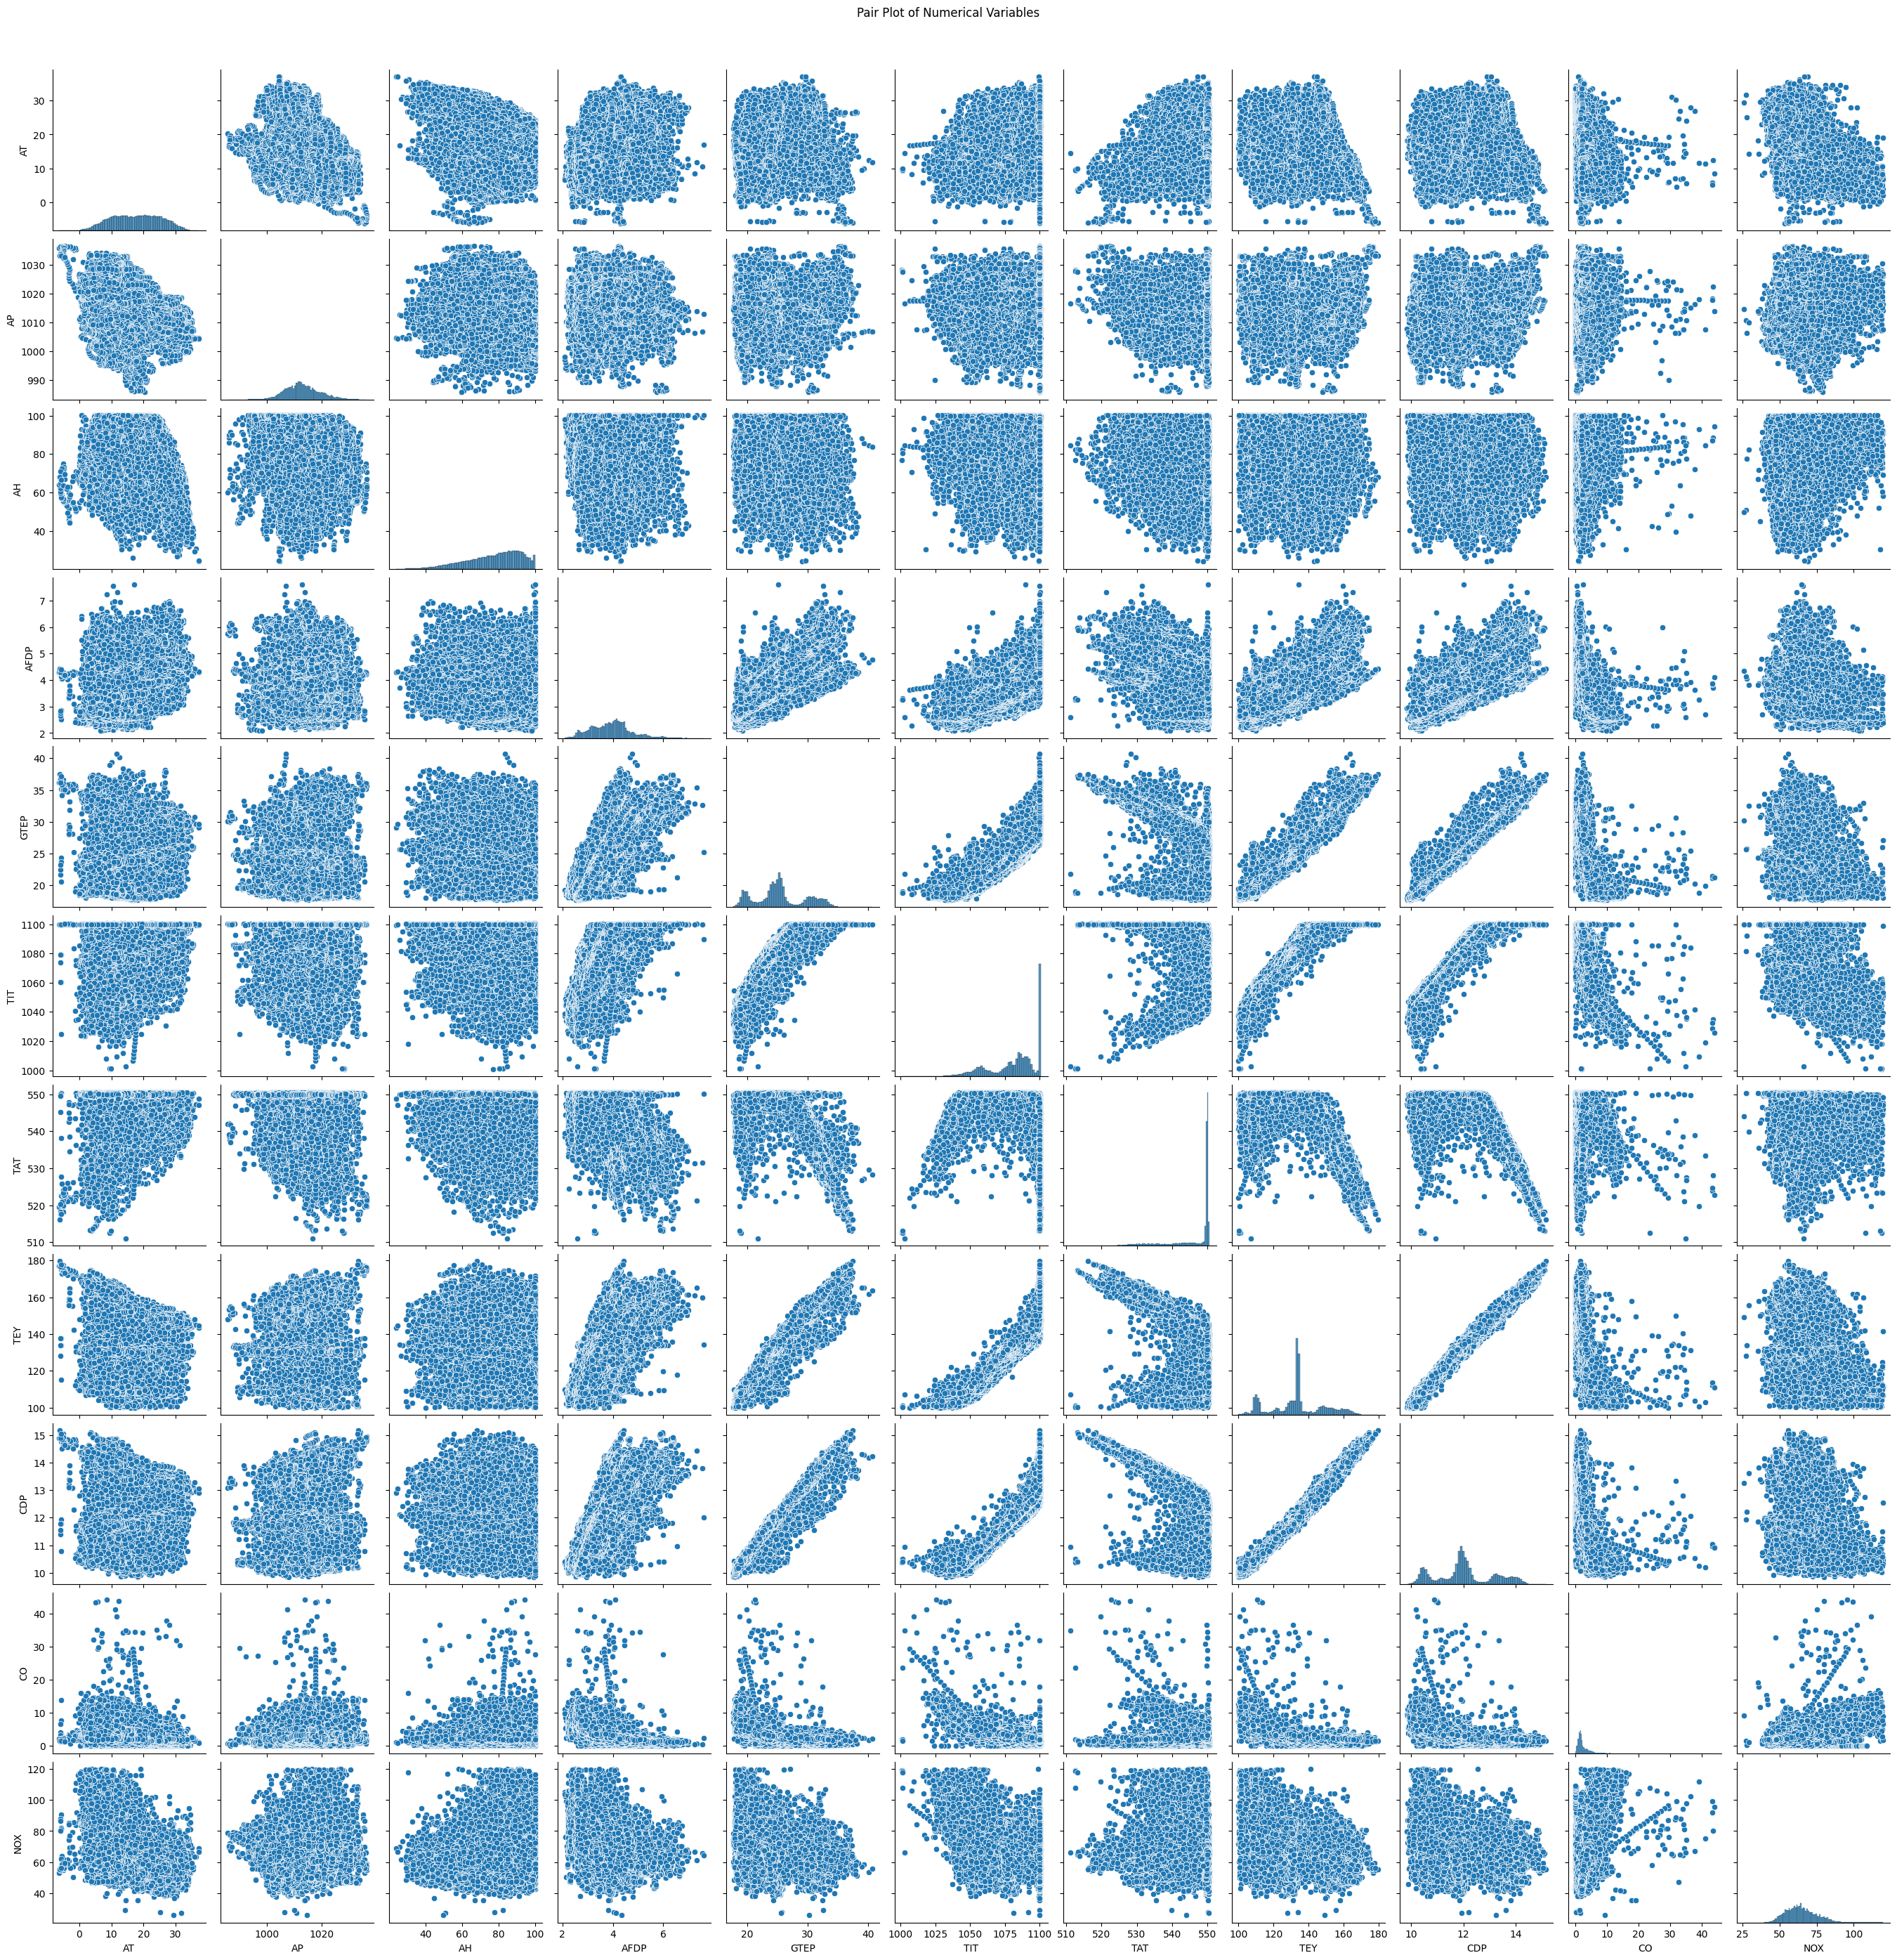

In [29]:
sns.pairplot(df_combined)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)  # Add title with some spacing
plt.show()

* Cheking for multicollinearity

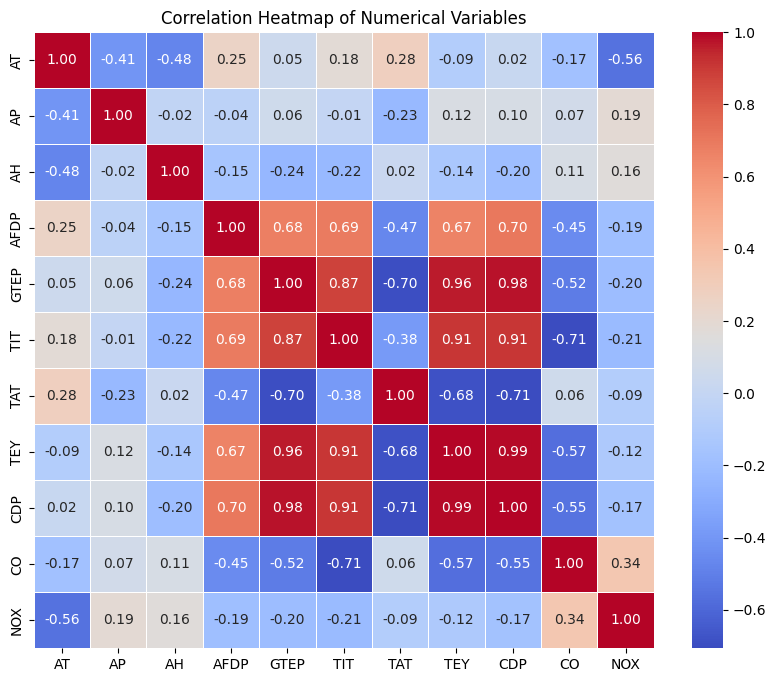

In [30]:
# Compute correlation matrix
correlation_matrix = df_combined.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

* Boxplot for checking outlier

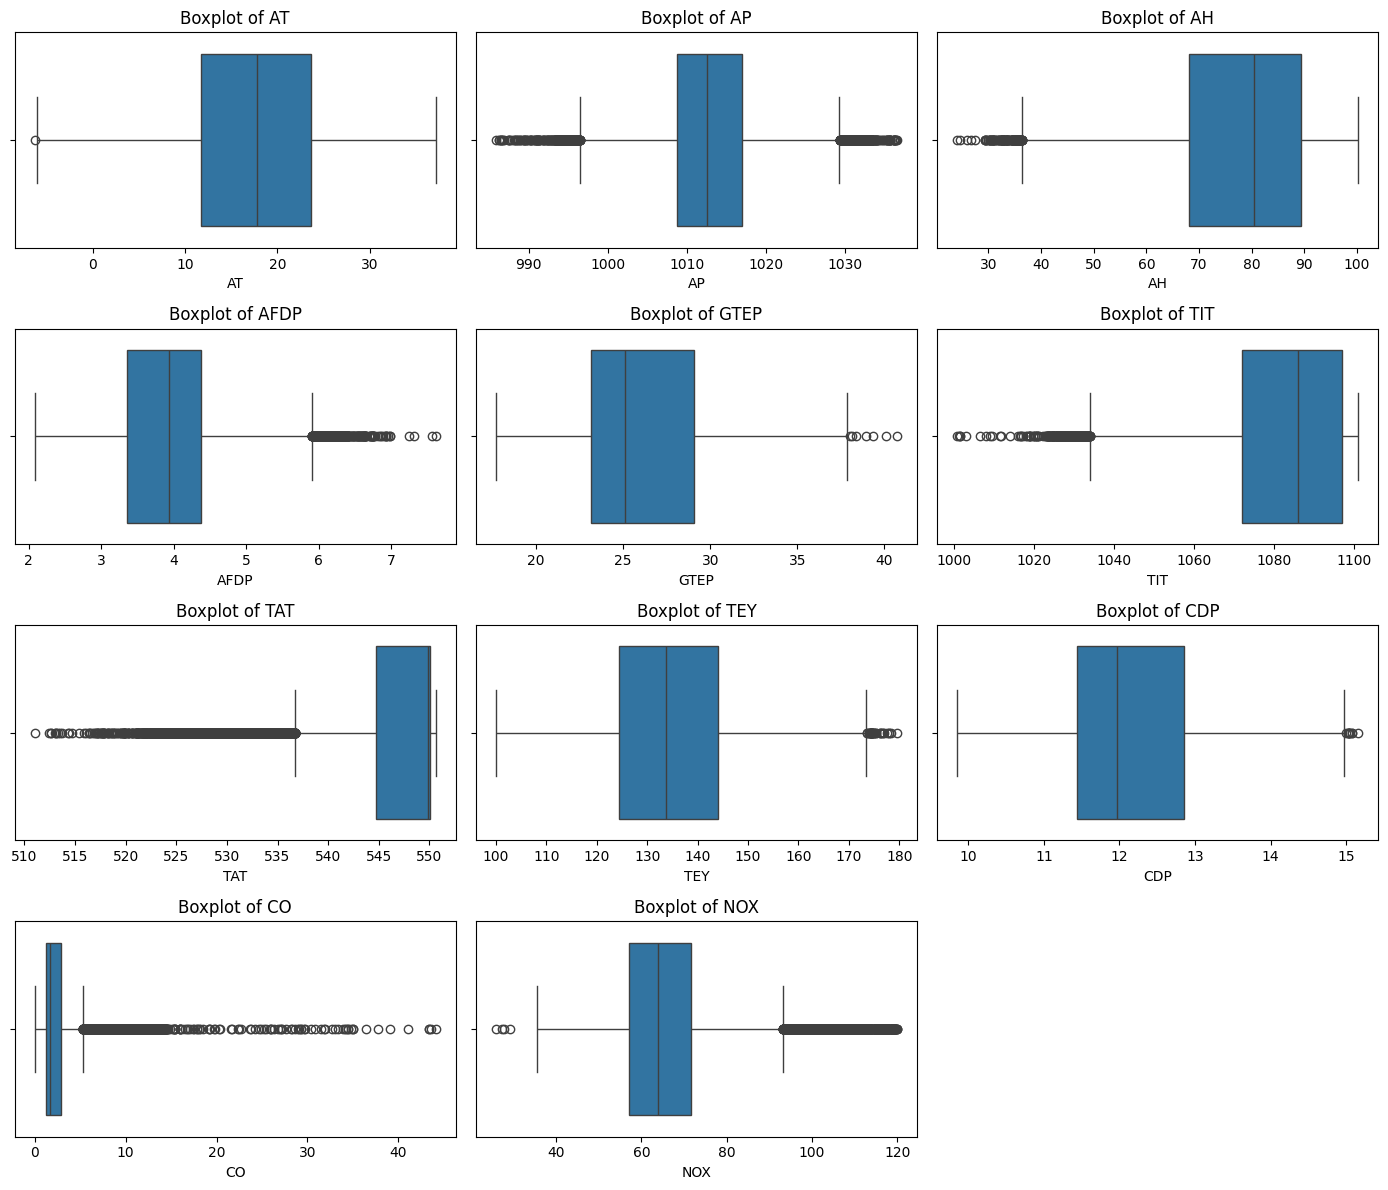

In [31]:
# Set the figure size for all boxplots
plt.figure(figsize=(14, 12))

# Loop through all numerical columns and create a boxplot for each
for i, column in enumerate(df_combined.select_dtypes(include=['number']).columns):
    plt.subplot(4, 3, i+1)  # 4 rows and 3 columns for 11 plots
    sns.boxplot(data=df_combined, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust layout so plots don't overlap
plt.show()

* Histogram for checking skewness of distribution of data

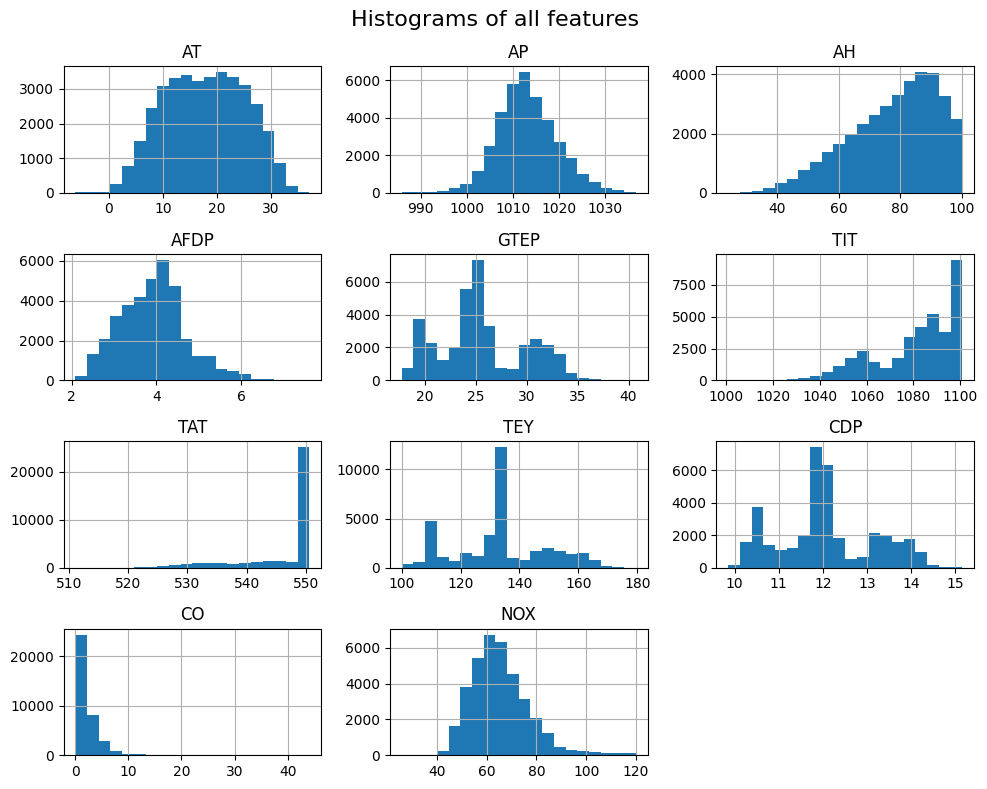

In [32]:
df_combined.hist(figsize=(10,8), bins =20)
plt.suptitle('Histograms of all features', fontsize =16)
plt.tight_layout()
plt.show()

* Log transformation for variables that is either highly positive skewed or highly negative skewed

In [92]:
# Features and targets to log transform
features_to_transform = ['AH', 'TIT', 'TAT', 'GTEP', 'AFDP', ]
targets_to_transform = ['CO', 'NOX']

# Apply log1p (log(x+1)) to avoid issues with zero values
for feature in features_to_transform + targets_to_transform:
    df_combined[feature] = np.log1p(df_combined[feature]) 

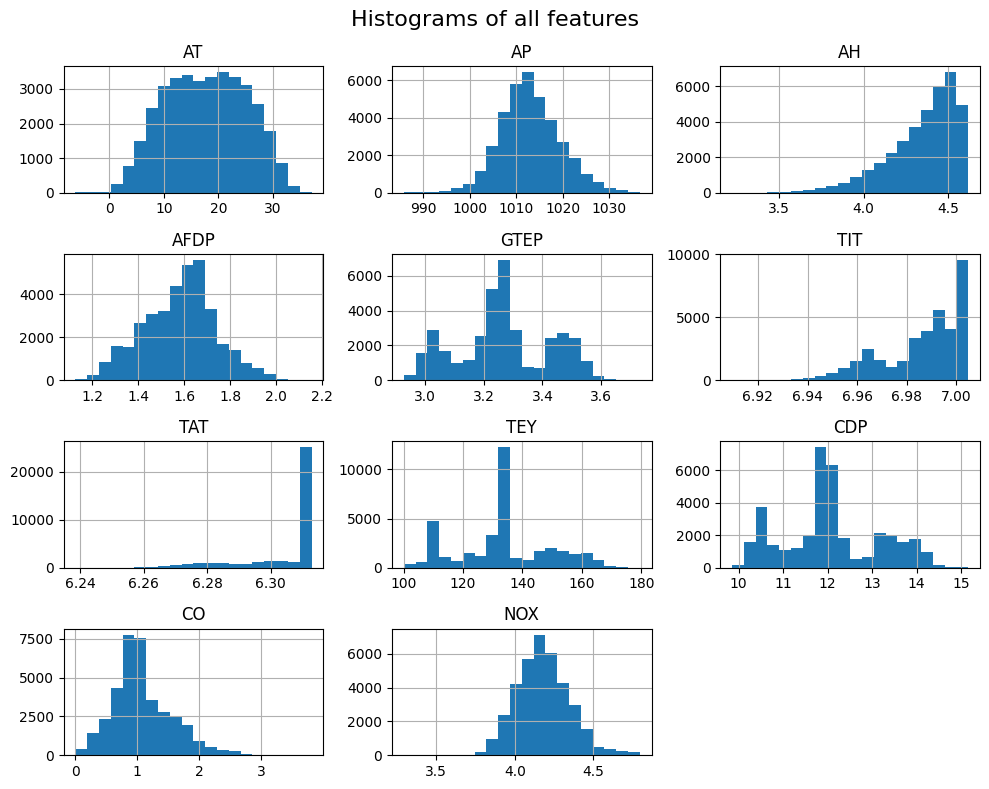

In [93]:
df_combined.hist(figsize=(10,8), bins =20)
plt.suptitle('Histograms of all features', fontsize =16)
plt.tight_layout()
plt.show()  

* Normalization of data for uniformity

In [35]:
from sklearn.preprocessing import StandardScaler

# Separate features (drop target column)
train_features = df_combined.drop(columns=['CO', 'NOX'])
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_features)

# Transform the training data
train_features_scaled = scaler.transform(train_features)



In [36]:
# Replacing original with scaled value
df_combined[train_features.columns] = train_features_scaled

* Importing Important module for model fitting

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

* A function that will evaluate model by calculation MAE, RMSE, R2

In [38]:
# Assuming evaluate_model is defined elsewhere to compute MAE, RMSE, and R²
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

### Model training and testing on raw data before any feature extraction or dimensionality reduction

* Different model training on data from 2011 -2014
* Testing and evaluating model on testing data of year 2015 

In [39]:

# Split df_combined into features (X) and targets (y)
features = df_combined.drop(columns=["CO", "NOX"])  
target_CO = df_combined["CO"]
target_NOX = df_combined["NOX"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train_CO, y_test_CO, y_train_NOX, y_test_NOX = train_test_split(
    features, target_CO, target_NOX, test_size=0.2, random_state=42
)

y_test_CO = np.expm1(y_test_CO)
y_test_NOX = np.expm1(y_test_NOX)

# Define models 
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000)
}

# Initialize an empty list to store results
results = []

# Iterate over models for CO and NOX predictions
for name, model in models.items():
    # Train the model for CO
    model.fit(X_train, y_train_CO)
    
    predictions_CO_log= model.predict(X_test)
    predictions_CO = np.expm1(predictions_CO_log)
    mae_CO, rmse_CO, r2_CO = evaluate_model(y_test_CO, predictions_CO)

    # Train the model for NOX
    model.fit(X_train, y_train_NOX)
    predictions_NOX_log= model.predict(X_test)
    predictions_NOX = np.expm1(predictions_NOX_log)
    mae_NOX, rmse_NOX, r2_NOX = evaluate_model(y_test_NOX, predictions_NOX)

    # Append results
    results.append([name, "CO", mae_CO, rmse_CO, r2_CO])
    results.append([name, "NOX", mae_NOX, rmse_NOX, r2_NOX])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Target", "MAE", "RMSE", "R²"])

# Print the results in a table format
print(results_df.to_string(index=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2264
[LightGBM] [Info] Number of data points in the train set: 29386, number of used features: 9
[LightGBM] [Info] Start training from score 1.082789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2264
[LightGBM] [Info] Number of data points in the train set: 29386, number of used features: 9
[LightGBM] [Info] Start training from score 4.179722
                 Model Target      MAE     RMSE       R²
     Linear Regression     CO 0.741477 1.470335 0.602422
     Linear Regression    NOX 5.776058 8.211201 0.491202
         Random Forest     CO 0.477630 1.149306 0.757081
         Random Forest    NOX 2.595846 4.073922 0.874756
Support Vector Machine     CO 0.5

* Use of Princiapl Component Analysis(PCA) for feature extraction

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA to the data and transform the data
pca = PCA(n_components=5)  # 5 pcs component will be extracted
train_pca = pca.fit_transform(train_features_scaled)


# We can later rank the components based on explained variance, for example:
explained_variance_ratio = pca.explained_variance_ratio_

# To see how much variance each component explains:
print(explained_variance_ratio)

[0.54130376 0.20123013 0.10828766 0.06120483 0.05425273]


* Using UMAP for extracting non linear information from the data

In [ ]:
import umap

# Initialize UMAP with the desired number of components (e.g., 5 components)
umap_model = umap.UMAP(n_components=5, random_state=42)

# Fit and transform the data (both training and test data)
train_umap = umap_model.fit_transform(train_features_scaled)



C:\Users\Rishu\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

C:\Users\Rishu\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the pca_data
scaler.fit(train_pca)

# Transform the pca_data
train_pca_scaled = scaler.transform(train_pca)


In [43]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the umap_data
scaler.fit(train_umap)

# Transform the umap_data
train_umap_scaled = scaler.transform(train_umap)



In [44]:
# Step 2: Convert PCA outputs to DataFrames with meaningful column names
pca_columns = [f"PC{i+1}" for i in range(train_pca_scaled.shape[1])]  # Create names like 'PC1', 'PC2', ...
train_pca_df = pd.DataFrame(train_pca_scaled, columns=pca_columns, index=df_combined.index)  # Use original index


In [45]:
# Step 2: Convert PCA outputs to DataFrames with meaningful column names
umap_columns = [f"UMAP{i+1}" for i in range(train_umap_scaled.shape[1])]  # Create names like 'PC1', 'PC2', ...
train_umap_df = pd.DataFrame(train_umap_scaled, columns=umap_columns, index=df_combined.index)  # Use original index


In [46]:
# Step 3: Concatenate PCA features with the original DataFrame
df_combined_DR = pd.concat([df_combined, train_pca_df, train_umap_df], axis=1) # DR stands for Dimensionality reduction

In [47]:

# Split df_combined into features (X) and targets (y)
features = df_combined_DR.drop(columns=["CO", "NOX"])  
target_CO = df_combined_DR["CO"]
target_NOX = df_combined_DR["NOX"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train_CO, y_test_CO, y_train_NOX, y_test_NOX = train_test_split(
    features, target_CO, target_NOX, test_size=0.2, random_state=42
)

y_test_CO = np.expm1(y_test_CO)
y_test_NOX = np.expm1(y_test_NOX)

# Define models excluding Neural Network
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Initialize an empty list to store results
results = []

# Iterate over models for CO and NOX predictions
for name, model in models.items():
    # Train the model for CO
    model.fit(X_train, y_train_CO)
    
    predictions_CO_log= model.predict(X_test)
    predictions_CO = np.expm1(predictions_CO_log)
    mae_CO, rmse_CO, r2_CO = evaluate_model(y_test_CO, predictions_CO)

    # Train the model for NOX
    model.fit(X_train, y_train_NOX)
    predictions_NOX_log= model.predict(X_test)
    predictions_NOX = np.expm1(predictions_NOX_log)
    mae_NOX, rmse_NOX, r2_NOX = evaluate_model(y_test_NOX, predictions_NOX)

    # Append results
    results.append([name, "CO", mae_CO, rmse_CO, r2_CO])
    results.append([name, "NOX", mae_NOX, rmse_NOX, r2_NOX])

# Convert results to a DataFrame
results_df_2 = pd.DataFrame(results, columns=["Model", "Target", "MAE", "RMSE", "R²"])

# Print the results in a table format
print(results_df_2.to_string(index=False))


                 Model Target      MAE     RMSE       R²
     Linear Regression     CO 0.716515 1.462004 0.606914
     Linear Regression    NOX 4.959301 6.969707 0.633426
         Random Forest     CO 0.470727 1.150498 0.756577
         Random Forest    NOX 2.530141 4.005472 0.878929
Support Vector Machine     CO 0.534021 1.216171 0.727994
Support Vector Machine    NOX 3.682298 5.025128 0.809442


### Joint prediction of CO and NOX emisssion using advanced models to explore interactions between the two outputs

In [52]:
#list of files
files = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv','gt_2015.csv']
# read each data frame and store them in a list of dataframe
dfs = [pd.read_csv(file) for file in files]

df_advance = pd.concat(dfs, ignore_index= True)


In [53]:
# Features and targets to log transform
features_to_transform = ['AP', 'AH', 'TIT', 'TAT', 'GTEP']
targets_to_transform = ['CO', 'NOX']

# Apply log1p (log(x+1)) to avoid issues with zero values
for feature in features_to_transform + targets_to_transform:
    df_advance[feature] = np.log1p(df_advance[feature]) 

In [54]:
# Separate features (drop target column)
train_features = df_advance.drop(columns=['CO', 'NOX'])
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_features)

# Transform the training data
train_features_scaled = scaler.transform(train_features)

In [55]:
df_advance[train_features.columns] = train_features_scaled

In [56]:
# Split df_combined into features (X) and targets (y)
features = df_advance.drop(columns=["CO", "NOX"])  # Replace with your actual feature columns
target_CO = df_advance["CO"]
target_NOX = df_advance["NOX"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train_CO, y_test_CO, y_train_NOX, y_test_NOX = train_test_split(
    features, target_CO, target_NOX, test_size=0.2, random_state=42
)


y_test_CO = np.expm1(y_test_CO)
y_test_NOX = np.expm1(y_test_NOX)

In [57]:
from sklearn.neural_network import MLPRegressor

# Define the MLP model with two outputs (CO and NOX)
mlp_model = MLPRegressor(hidden_layer_sizes=(80, 30), max_iter=1000, random_state=42)

# Train the model on both CO and NOX (combine y_train_CO and y_train_NOX)
y_train = np.column_stack((y_train_CO, y_train_NOX))
y_test = np.column_stack((y_test_CO, y_test_NOX))

# Fit the model
mlp_model.fit(X_train, y_train)

# Predict both CO and NOX
predictions = mlp_model.predict(X_test)


# Separate predictions for CO and NOX
predictions_CO_log= predictions[:, 0]
predictions_NOX_log= predictions[:, 1]
predictions_NOX = np.expm1(predictions_NOX_log)
predictions_CO = np.expm1(predictions_CO_log)

# Evaluate predictions for CO
mae_CO, rmse_CO, r2_CO = evaluate_model(y_test_CO, predictions_CO)

# Evaluate predictions for NOX
mae_NOX, rmse_NOX, r2_NOX = evaluate_model(y_test_NOX, predictions_NOX)

# Print evaluation results
print(f"MLP - CO: MAE={mae_CO}, RMSE={rmse_CO}, R²={r2_CO}")
print(f"MLP - NOX: MAE={mae_NOX}, RMSE={rmse_NOX}, R²={r2_NOX}") 


MLP - CO: MAE=0.5338694611738991, RMSE=1.1437100846011274, R²=0.7594409515144507
MLP - NOX: MAE=3.593947221578471, RMSE=5.230921643752458, R²=0.7935149054568982


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2264
[LightGBM] [Info] Number of data points in the train set: 29386, number of used features: 9
[LightGBM] [Info] Start training from score 1.082789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2264
[LightGBM] [Info] Number of data points in the train set: 29386, number of used features: 9
[LightGBM] [Info] Start training from score 4.179722


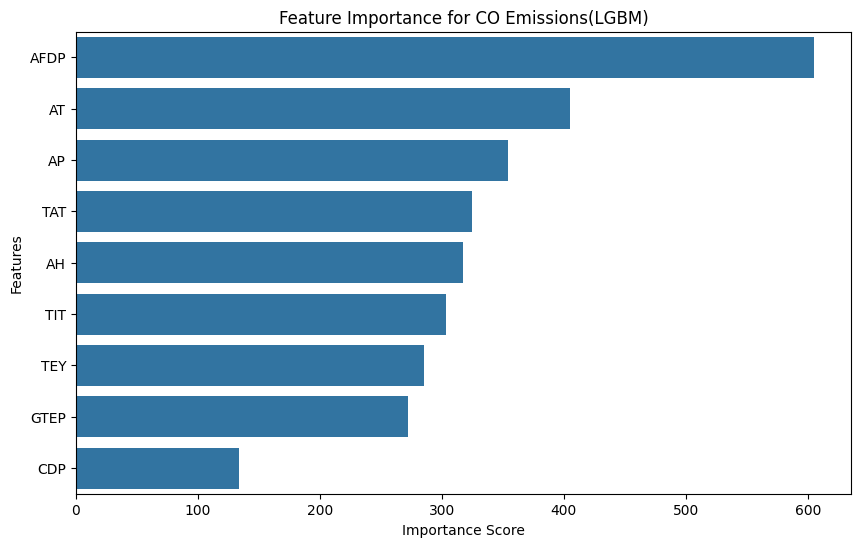

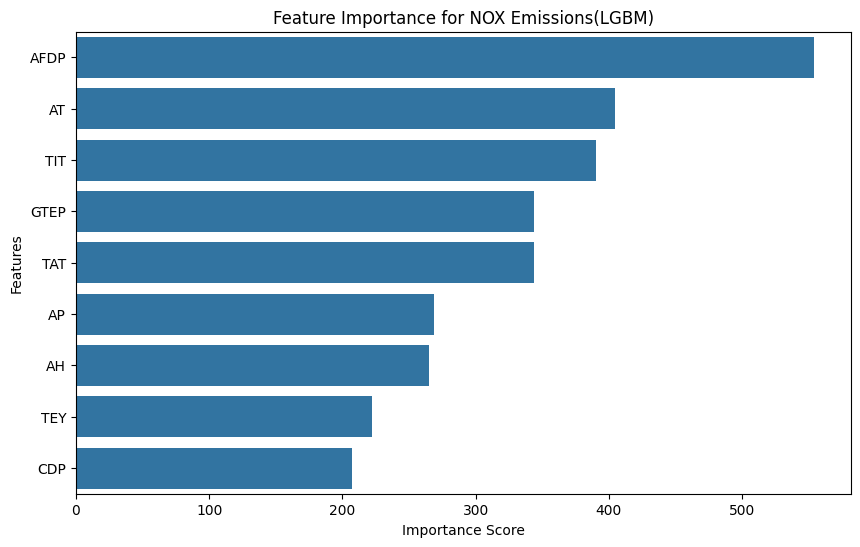

In [59]:

# Train a LightGBM model
lgb_model_CO = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model_CO.fit(X_train, y_train_CO)  # For CO emissions

# Train a LightGBM model
lgb_model_NOX = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model_NOX.fit(X_train, y_train_NOX)  # For NOX emissions


# Extract feature importances
importance_lgb_CO = lgb_model_CO.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_lgb_CO_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance_lgb_CO
}).sort_values(by="Importance", ascending=False)

importance_lgb_NOX = lgb_model_NOX.feature_importances_
# Create a DataFrame for visualization
importance_lgb_NOX_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance_lgb_NOX
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_lgb_CO_df)
plt.title("Feature Importance for CO Emissions(LGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_lgb_NOX_df)
plt.title("Feature Importance for NOX Emissions(LGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


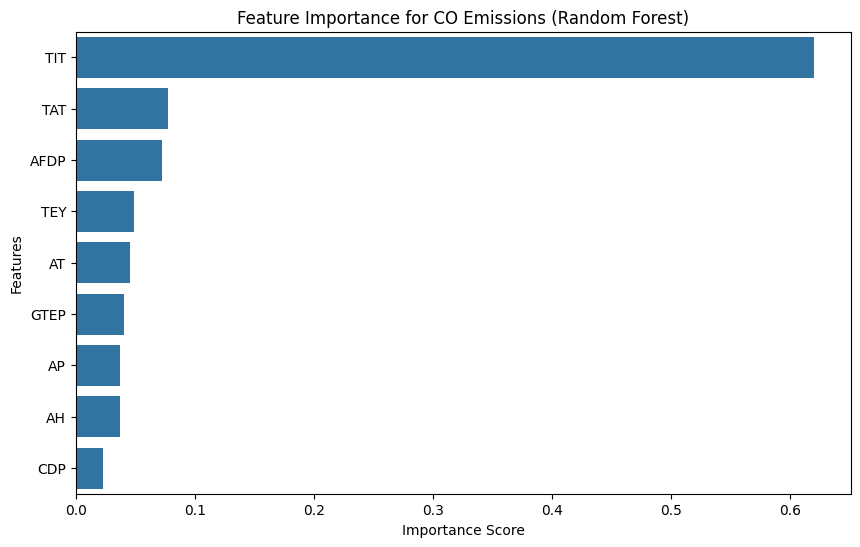

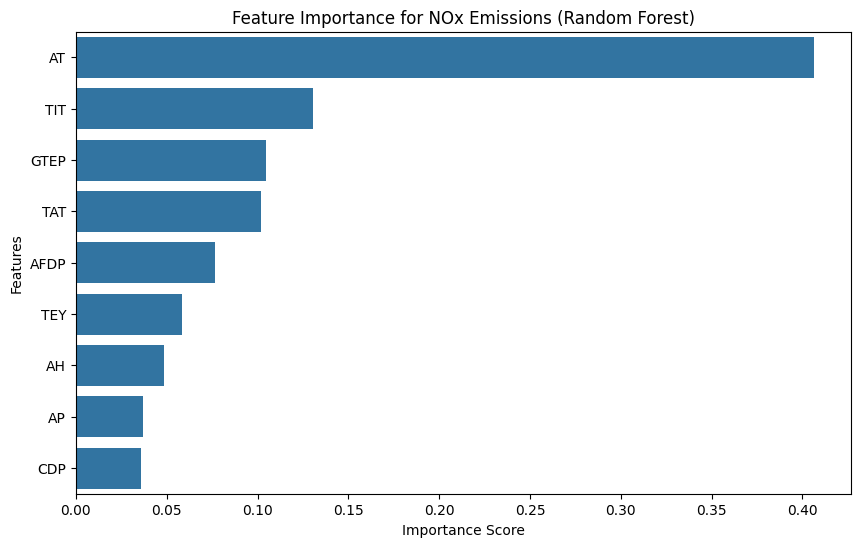

Top Features for CO Emissions:
  Feature  Importance
5     TIT    0.619788
6     TAT    0.077114
3    AFDP    0.071966
7     TEY    0.049068
0      AT    0.045527
4    GTEP    0.040553
1      AP    0.036673
2      AH    0.036634
8     CDP    0.022677

Top Features for NOx Emissions:
  Feature  Importance
0      AT    0.406386
5     TIT    0.130651
4    GTEP    0.104859
6     TAT    0.101657
3    AFDP    0.076698
7     TEY    0.058390
2      AH    0.048266
1      AP    0.037048
8     CDP    0.036045


In [60]:

# Train Random Forest for CO emissions
rf_model_CO = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_CO.fit(X_train, y_train_CO)

# Train Random Forest for NOx emissions
rf_model_NOX = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_NOX.fit(X_train, y_train_NOX)

# Extract feature importance for CO
importance_CO = rf_model_CO.feature_importances_
features = X_train.columns

importance_df_CO = pd.DataFrame({
    "Feature": features,
    "Importance": importance_CO
}).sort_values(by="Importance", ascending=False)

# Extract feature importance for NOx
importance_NOX = rf_model_NOX.feature_importances_

importance_df_NOX = pd.DataFrame({
    "Feature": features,
    "Importance": importance_NOX
}).sort_values(by="Importance", ascending=False)

# Visualize feature importance for CO
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df_CO)
plt.title("Feature Importance for CO Emissions (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Visualize feature importance for NOx
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df_NOX)
plt.title("Feature Importance for NOx Emissions (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print ranked features for both targets
print("Top Features for CO Emissions:")
print(importance_df_CO.head(10))

print("\nTop Features for NOx Emissions:")
print(importance_df_NOX.head(10))


# Bonus Task: Predicting Turbine Energy Yield (TEY) 

In [82]:
#list of files
files = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv','gt_2015.csv']
# read each data frame and store them in a list of dataframe
dfs = [pd.read_csv(file) for file in files]

df = pd.concat(dfs, ignore_index= True)

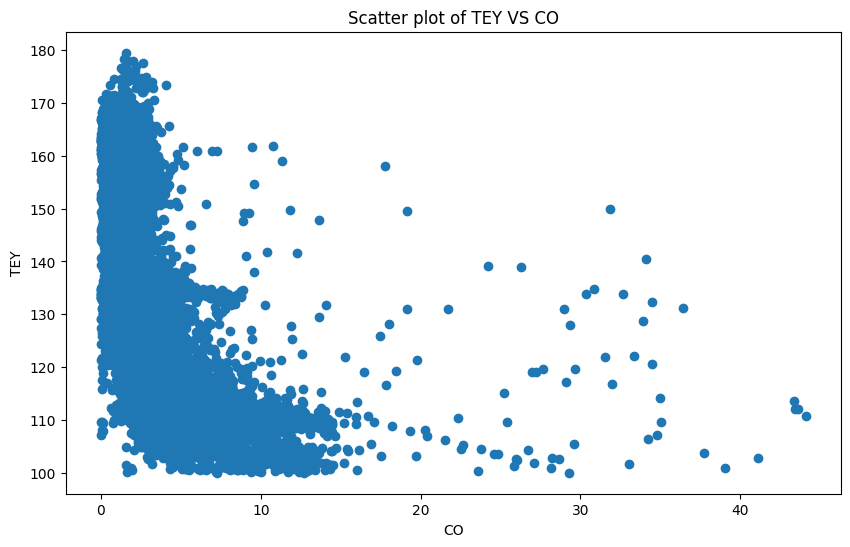

In [83]:
# Plot TEY VS CO
plt.figure(figsize=(10, 6))
plt.scatter(x=df['CO'], y= df['TEY'])
plt.title("Scatter plot of TEY VS CO")
plt.xlabel("CO")
plt.ylabel("TEY")
plt.show()

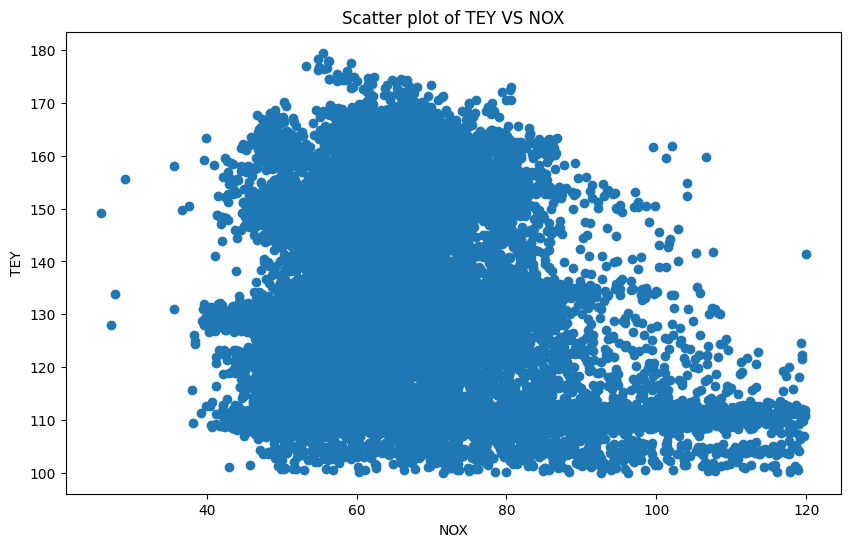

In [84]:
# Plot TEY VS NOX
plt.figure(figsize=(10, 6))
plt.scatter(x=df['NOX'], y= df['TEY'])
plt.title("Scatter plot of TEY VS NOX")
plt.xlabel("NOX")
plt.ylabel("TEY")
plt.show()

In [85]:
# Features and targets to log transform
features_to_transform = df[['AP', 'AH']]

# Apply log1p (log(x+1)) to avoid issues with zero values
for feature in features_to_transform:
    df[feature] = np.log1p(df[feature]) 

In [86]:
from sklearn.preprocessing import StandardScaler

# Separate features (drop target column)
train_features = df[['AP', 'AT', 'AH']]
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_features)

# Transform the training data
train_features_scaled = scaler.transform(train_features)

In [87]:
df[train_features.columns] = train_features_scaled

In [88]:
# Split df into features (X) and targets (y)
features = df[['AP', 'AT', 'AH']]  
target_TEY = df["TEY"]
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train_TEY, y_test_TEY= train_test_split(
    features, target_TEY, test_size=0.2, random_state=42
)


In [89]:
# Define models 
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000)
}

# Initialize an empty list to store results
results = []

# Iterate over models for CO and NOX predictions
for name, model in models.items():
    # Train the model for CO
    model.fit(X_train, y_train_TEY)
    
    predictions_TEY= model.predict(X_test)
    mae_TEY, rmse_TEY, r2_TEY = evaluate_model(y_test_TEY, predictions_TEY)

    # Append results
    results.append([name, "TEY", mae_TEY, rmse_TEY, r2_TEY])

# Convert results to a DataFrame
results_df_3 = pd.DataFrame(results, columns=["Model", "Target", "MAE", "RMSE", "R²"])

# Print the results in a table format
print(results_df.to_string(index=False))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 29386, number of used features: 3
[LightGBM] [Info] Start training from score 133.479425
                 Model Target      MAE     RMSE       R²
     Linear Regression     CO 0.741477 1.470335 0.602422
     Linear Regression    NOX 5.776058 8.211201 0.491202
         Random Forest     CO 0.477630 1.149306 0.757081
         Random Forest    NOX 2.595846 4.073922 0.874756
Support Vector Machine     CO 0.548161 1.215324 0.728372
Support Vector Machine    NOX 3.756686 5.115796 0.802504
              LightGBM     CO 0.534814 1.213269 0.729290
              LightGBM    NOX 3.203057 4.693861 0.833738
              CatBoost     CO 0.506799 1.138645 0.761567
              CatBoost    NOX 2.871623 4.242472 0.864178
        Neural Network     CO 0

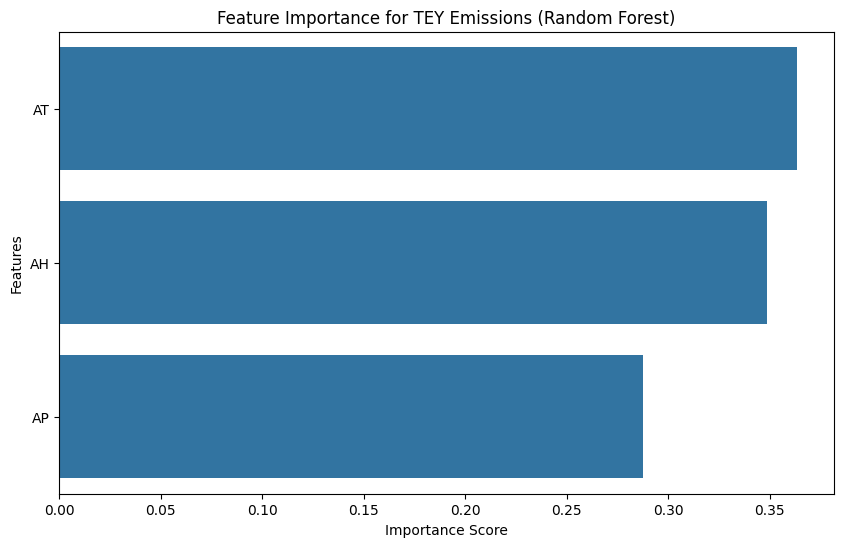


Top Features for TEY:
  Feature  Importance
1      AT    0.363541
2      AH    0.348882
0      AP    0.287577


In [90]:

# Train Random Forest for TEY emissions
rf_model_TEY = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_TEY.fit(X_train, y_train_TEY)



# Extract feature importance for TEY
importance_TEY = rf_model_TEY.feature_importances_
features = X_train.columns

importance_df_TEY = pd.DataFrame({
    "Feature": features,
    "Importance": importance_TEY
}).sort_values(by="Importance", ascending=False)



# Visualize feature importance for TEY
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df_TEY)
plt.title("Feature Importance for TEY Emissions (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()





print("\nTop Features for TEY:")
print(importance_df_TEY.head(10))
